In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'a-large-scale-fish-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1165452%2F2170465%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240407%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240407T174516Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd51d823f76686880622d2fb9ca7ec93121a8f8aa40dec3ce9dd733c7fa5bd07a62f0ea649a37e230e1bc1f92f60defa09444f6e5ac84fa9d601b2881119c6d30b8048ee8e657708b6a3a997f37f2dd3222c5977482c3b0b5ac9fa0e74b82131aab21ea7279968ea38a1dfec295e42214b2cb1e7eb89347860c1ad8e5e3dbc314cafe35bea205fa436c2016c065e76f939af7d6fa7cd714b68dee8ea2623d1dfa1ec14a04ee6357d8d29caa46551ec047b405ecc34b5cad24bd00b99f0cf297ee3b4d15f45bed0b91ad50bef4facbfae9f24f59ac258db6e62f8068879a2167b6917b237644d6fabed720f314cf04548e5bacdbaef5cd4d54c68571f847458ada'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3482438117 bytes downloaded
Downloaded and uncompressed: a-large-scale-fish-dataset
Data source import complete.


In [ ]:


import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [ ]:
from pathlib import Path

## Read the data

In [ ]:
dataset_path = Path(r'../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset')

file_path = list(dataset_path.glob(r'**/*.png'))

# create labels from the folder name
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [ ]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)

df.columns = ['image', 'label']

df.head()

,image,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream GT


## Display the images in the dataset

In [ ]:
import matplotlib.pyplot as plt

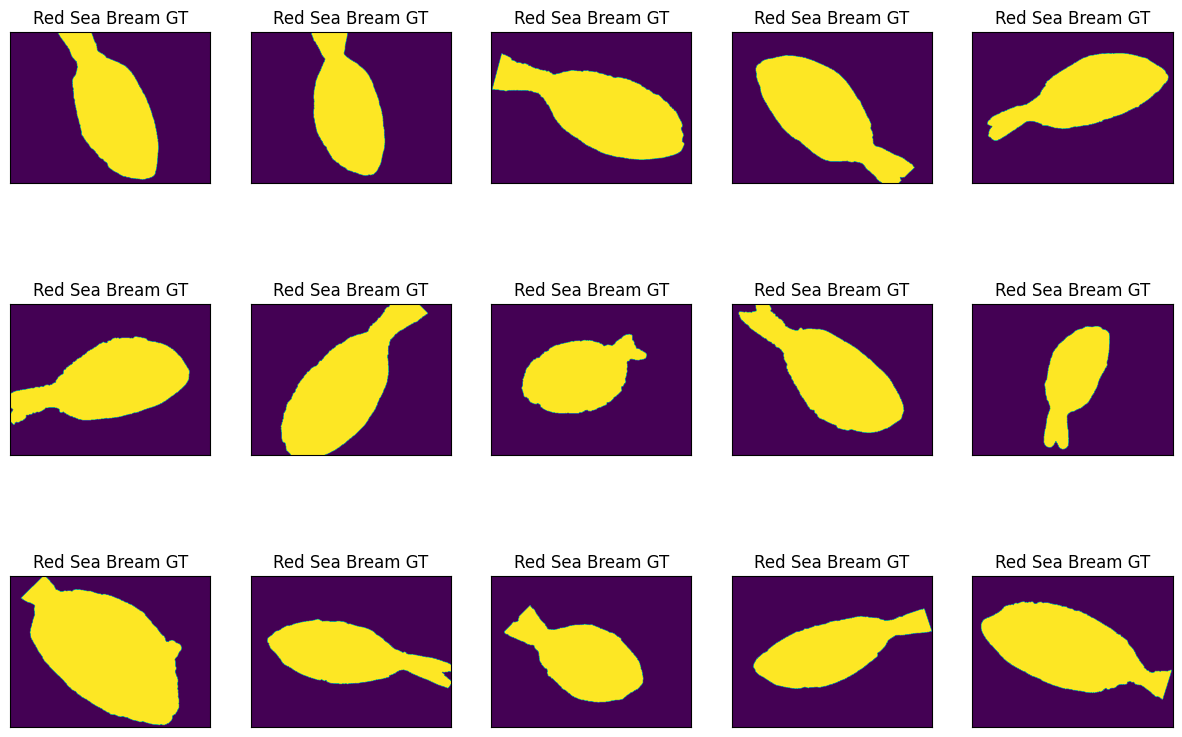

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])

plt.show()

## Check number of diffrent class of fish in the dataset
Note that the ground truth files have also been added (Files with 'GT' in their name)

In [ ]:
df.label.value_counts()

label
Red Sea Bream GT         1000
Red Sea Bream            1000
Sea Bass                 1000
Sea Bass GT              1000
Red Mullet               1000
Red Mullet GT            1000
Hourse Mackerel          1000
Hourse Mackerel GT       1000
Trout                    1000
Trout GT                 1000
Black Sea Sprat          1000
Black Sea Sprat GT       1000
Gilt-Head Bream          1000
Gilt-Head Bream GT       1000
Shrimp GT                1000
Shrimp                   1000
Striped Red Mullet GT    1000
Striped Red Mullet       1000
Name: count, dtype: int64

We will remove the ground truth files, we don't need them.

In [ ]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

label
Red Sea Bream         1000
Sea Bass              1000
Red Mullet            1000
Hourse Mackerel       1000
Trout                 1000
Black Sea Sprat       1000
Gilt-Head Bream       1000
Shrimp                1000
Striped Red Mullet    1000
Name: count, dtype: int64

## Create train, test and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [ ]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (5040, 2)
Shape of test data (2700, 2)
Shape of validation data (1260, 2)


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [ ]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 5040 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.


## Define the model

In [ ]:
input_shape = (200, 200, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
158/158 [==============================] - 122s 734ms/step - loss: 1.9163 - accuracy: 0.2544 - val_loss: 1.5712 - val_accuracy: 0.4167
Epoch 2/10
158/158 [==============================] - 112s 710ms/step - loss: 1.0354 - accuracy: 0.6012 - val_loss: 0.9912 - val_accuracy: 0.6159
Epoch 4/10
158/158 [==============================] - 111s 701ms/step - loss: 0.9127 - accuracy: 0.6440 - val_loss: 0.8411 - val_accuracy: 0.6889
Epoch 5/10
158/158 [==============================] - 113s 717ms/step - loss: 0.8127 - accuracy: 0.6857 - val_loss: 0.7526 - val_accuracy: 0.7143
Epoch 6/10
158/158 [==============================] - 112s 709ms/step - loss: 0.6488 - accuracy: 0.7538 - val_loss: 0.4941 - val_accuracy: 0.8230
Epoch 7/10
158/158 [==============================] - 114s 720ms/step - loss: 0.4954 - accuracy: 0.8111 - val_loss: 0.4080 - val_accuracy: 0.8492
Epoch 8/10
158/158 [==============================] - 110s 697ms/step - loss: 0.4469 - accuracy: 0.8373 - val_loss: 0.3870 -

In [ ]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

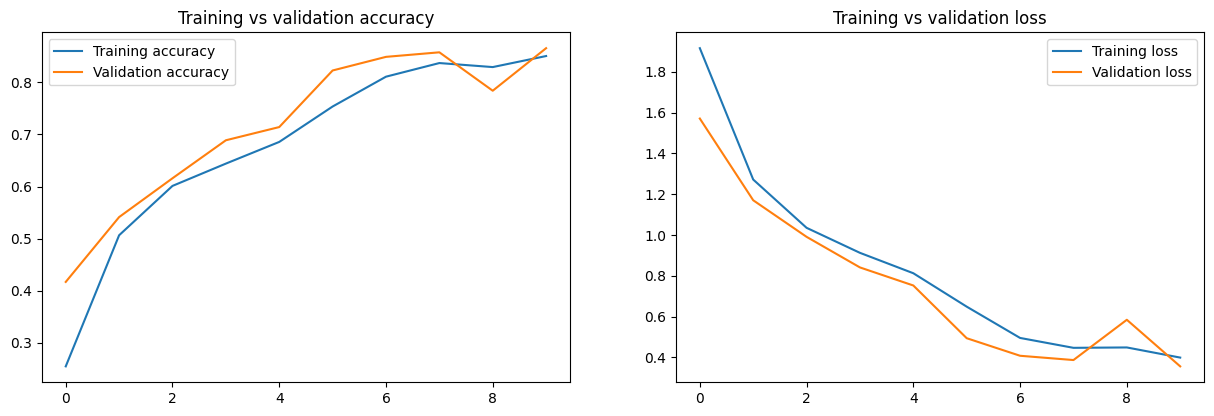

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

regularization

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9, activation='softmax')
])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 99, 99, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 23, 23, 32)       

In [ ]:
model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history1 = model1.fit(train, validation_data=val, epochs=10, callbacks=callback)

Epoch 1/10
158/158 [==============================] - 115s 715ms/step - loss: 2.0728 - accuracy: 0.1718 - val_loss: 1.9091 - val_accuracy: 0.2429
Epoch 2/10
158/158 [==============================] - 131s 832ms/step - loss: 1.7235 - accuracy: 0.2823 - val_loss: 1.5476 - val_accuracy: 0.3722
Epoch 3/10
158/158 [==============================] - 133s 844ms/step - loss: 1.4717 - accuracy: 0.3948 - val_loss: 1.4100 - val_accuracy: 0.4548
Epoch 4/10
158/158 [==============================] - 115s 728ms/step - loss: 1.3085 - accuracy: 0.4772 - val_loss: 1.1256 - val_accuracy: 0.5373
Epoch 5/10
158/158 [==============================] - 112s 710ms/step - loss: 1.1956 - accuracy: 0.5224 - val_loss: 1.0943 - val_accuracy: 0.5770
Epoch 6/10
158/158 [==============================] - 112s 707ms/step - loss: 1.0259 - accuracy: 0.5887 - val_loss: 0.8987 - val_accuracy: 0.6254
Epoch 7/10
158/158 [==============================] - 111s 701ms/step - loss: 0.9398 - accuracy: 0.6369 - val_loss: 0.9047 -

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


VGGNET

In [ ]:
def create_vgg_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
    for layer in base_model.layers:
        layer.trainable = False
    vggmodel = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        # tf.keras.layers.Dropout(0.5),  # Add dropout layer
        Dense(9, activation='softmax')
    ])
    return vggmodel

In [ ]:
# Compile and train the models
vgg_model = create_vgg_model()
vgg_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg_history = vgg_model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
158/158 [==============================] - 127s 761ms/step - loss: 1.4475 - accuracy: 0.5571 - val_loss: 0.7222 - val_accuracy: 0.7992
Epoch 2/10
158/158 [==============================] - 134s 848ms/step - loss: 0.5723 - accuracy: 0.8206 - val_loss: 0.5207 - val_accuracy: 0.8206
Epoch 3/10
158/158 [==============================] - 133s 841ms/step - loss: 0.3653 - accuracy: 0.8883 - val_loss: 0.3201 - val_accuracy: 0.8960
Epoch 4/10
158/158 [==============================] - 113s 715ms/step - loss: 0.2857 - accuracy: 0.9042 - val_loss: 0.2765 - val_accuracy: 0.9040
Epoch 5/10
158/158 [==============================] - 114s 718ms/step - loss: 0.2356 - accuracy: 0.9212 - val_loss: 0.1735 - val_accuracy: 0.9492
Epoch 6/10
158/158 [==============================] - 113s 715ms/step - loss: 0.2149 - accuracy: 0.9302 - val_loss: 0.1615 - val_accuracy: 0.9516
Epoch 7/10
158/158 [==============================] - 114s 721ms/step - loss: 0.1995 - accuracy: 0.9310 - val_loss: 0.1499 -

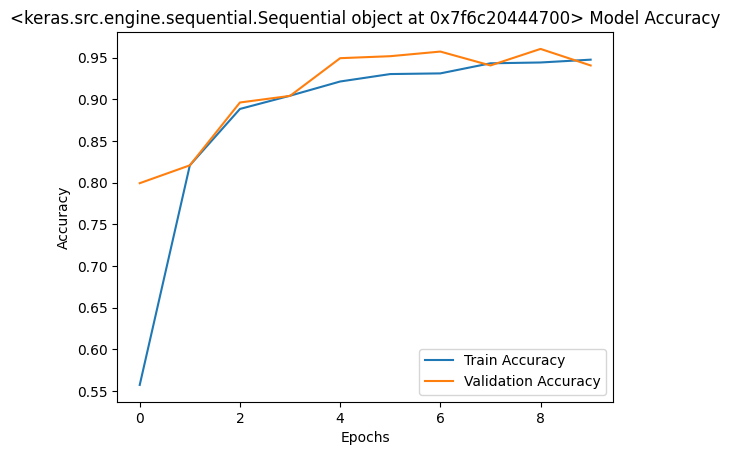

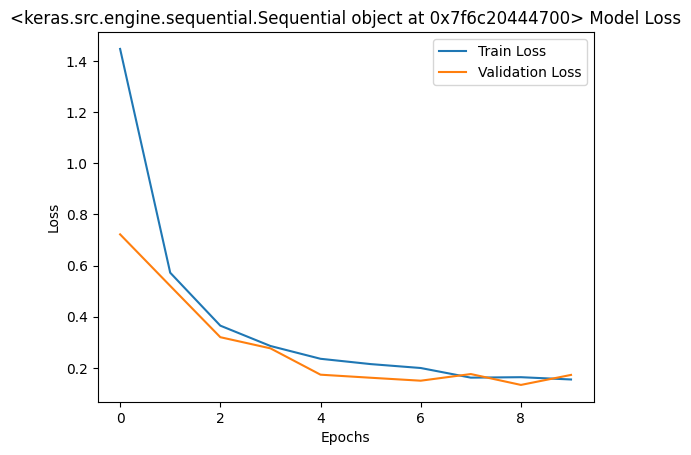

In [ ]:
def plot_training_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{vgg_model} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{vgg_model} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(vgg_history, vgg_model)

MOBILENET

In [ ]:
def create_mobilenet_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
    for layer in base_model.layers:
        layer.trainable = False
    mobilenetModel = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        # tf.keras.layers.Dropout(0.5),  # Add dropout layer
        Dense(9, activation='softmax')
    ])
    return mobilenetModel


In [ ]:
mobilenet_model = create_mobilenet_model()
mobilenet_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_history = mobilenet_model.fit(train, epochs=10, validation_data=val)

17225924/17225924 [==============================] - 1s 0us/step
Epoch 1/10
158/158 [==============================] - 132s 812ms/step - loss: 2.6664 - accuracy: 0.7873 - val_loss: 0.1382 - val_accuracy: 0.9452
Epoch 2/10
158/158 [==============================] - 109s 690ms/step - loss: 0.1453 - accuracy: 0.9498 - val_loss: 0.1357 - val_accuracy: 0.9468
Epoch 3/10
158/158 [==============================] - 110s 698ms/step - loss: 0.1275 - accuracy: 0.9542 - val_loss: 0.0925 - val_accuracy: 0.9698
Epoch 4/10
158/158 [==============================] - 109s 689ms/step - loss: 0.0938 - accuracy: 0.9679 - val_loss: 0.0488 - val_accuracy: 0.9802
Epoch 5/10
158/158 [==============================] - 109s 693ms/step - loss: 0.0844 - accuracy: 0.9710 - val_loss: 0.0724 - val_accuracy: 0.9762
Epoch 6/10
158/158 [==============================] - 108s 685ms/step - loss: 0.0625 - accuracy: 0.9792 - val_loss: 0.1177 - val_accuracy: 0.9587
Epoch 7/10
158/158 [==============================] - 108s 

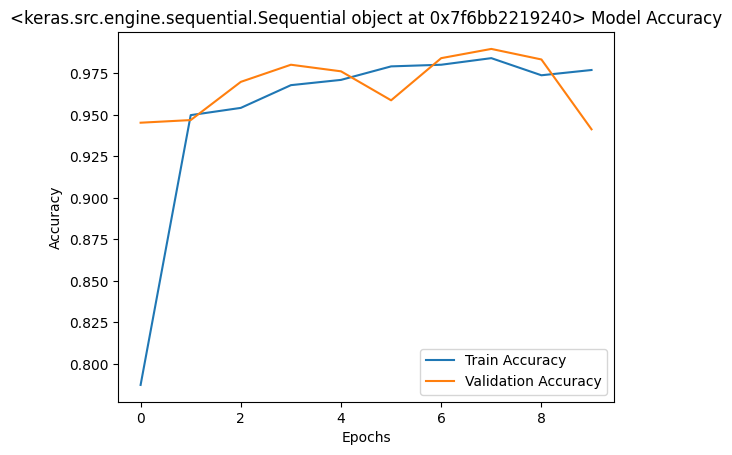

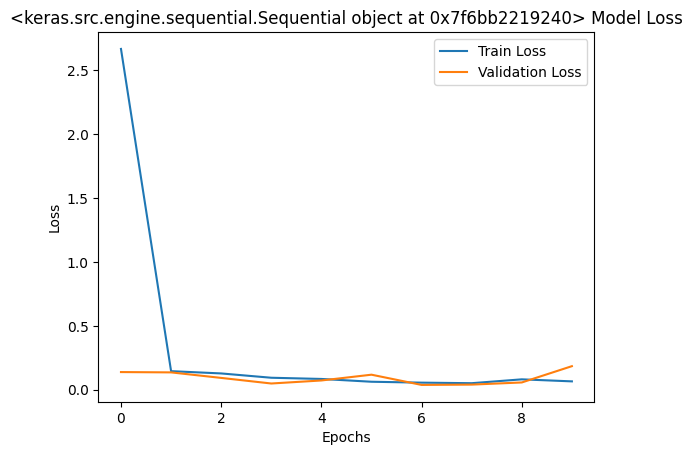

In [ ]:
def plot_training_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{mobilenet_model} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{mobilenet_model} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(mobilenet_history, mobilenet_model)

INCEPTION-V3

In [ ]:
from tensorflow.keras.applications import InceptionV3


In [ ]:
def create_inception_model():
    inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Freeze the weights of the InceptionV3 layers
    for layer in inception.layers:
      layer.trainable = False

# Build the custom model
    incModel = Sequential([
    inception,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    # layers.Dropout(0.5),
    Dense(9, activation='softmax'),
    ])
    return incModel



In [ ]:
inception_model = create_inception_model()
inception_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
inception_history = inception_model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
158/158 [==============================] - 126s 750ms/step - loss: 0.7297 - accuracy: 0.7679 - val_loss: 0.3984 - val_accuracy: 0.8690
Epoch 2/10
158/158 [==============================] - 113s 715ms/step - loss: 0.2689 - accuracy: 0.9042 - val_loss: 0.2104 - val_accuracy: 0.9325
Epoch 3/10
158/158 [==============================] - 114s 724ms/step - loss: 0.2436 - accuracy: 0.9115 - val_loss: 0.3424 - val_accuracy: 0.8865
Epoch 4/10
158/158 [==============================] - 115s 726ms/step - loss: 0.2024 - accuracy: 0.9278 - val_loss: 0.1932 - val_accuracy: 0.9302
Epoch 5/10
158/158 [==============================] - 113s 718ms/step - loss: 0.1815 - accuracy: 0.9339 - val_loss: 0.1514 - val_accuracy: 0.9460
Epoch 6/10
158/158 [==============================] - 113s 718ms/step - loss: 0.1517 - accuracy: 0.9464 - val_loss: 0.1903 - val_accuracy: 0.9310
Epoch 7/10
158/158 [==============================] - 131s 832ms/step - loss: 0.1536 - accuracy: 0.9460 - val_loss: 0.1353 -

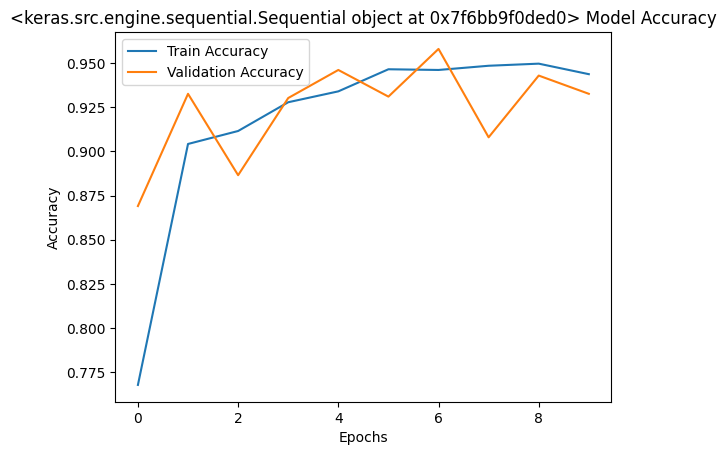

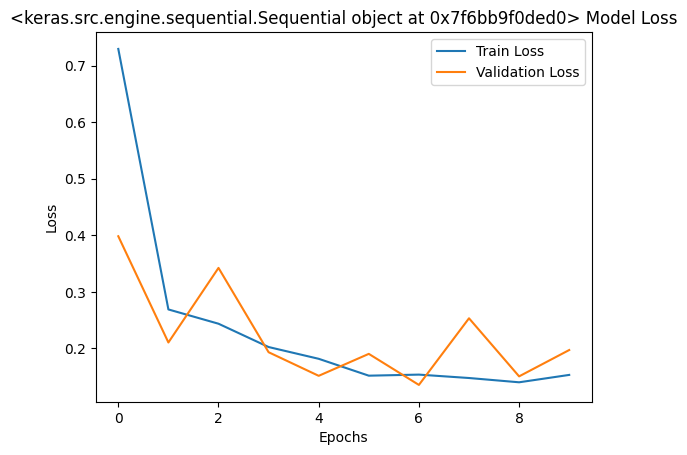

In [ ]:
def plot_training_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{inception_model} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{inception_model} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(inception_history, inception_model)

dropout

In [ ]:
def create_inception_model1():
    inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Freeze the weights of the InceptionV3 layers
    for layer in inception.layers:
      layer.trainable = False

# Build the custom model
    incModel1 = Sequential([
    inception,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax'),
    ])
    return incModel1



In [ ]:
inception_model1 = create_inception_model1()
inception_model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
inception_history1 = inception_model1.fit(train, epochs=10, validation_data=val)

Epoch 1/10
158/158 [==============================] - 146s 719ms/step - loss: 1.1350 - accuracy: 0.6383 - val_loss: 0.4268 - val_accuracy: 0.8524
Epoch 2/10
158/158 [==============================] - 114s 719ms/step - loss: 0.5975 - accuracy: 0.7883 - val_loss: 0.2966 - val_accuracy: 0.9095
Epoch 3/10
158/158 [==============================] - 115s 726ms/step - loss: 0.4836 - accuracy: 0.8294 - val_loss: 0.2872 - val_accuracy: 0.9079
Epoch 4/10
158/158 [==============================] - 113s 712ms/step - loss: 0.4173 - accuracy: 0.8591 - val_loss: 0.2334 - val_accuracy: 0.9190
Epoch 5/10
158/158 [==============================] - 112s 711ms/step - loss: 0.4029 - accuracy: 0.8587 - val_loss: 0.1994 - val_accuracy: 0.9349
Epoch 6/10
158/158 [==============================] - 113s 717ms/step - loss: 0.3852 - accuracy: 0.8671 - val_loss: 0.1776 - val_accuracy: 0.9405
Epoch 7/10
158/158 [==============================] - 113s 718ms/step - loss: 0.3762 - accuracy: 0.8639 - val_loss: 0.1927 -

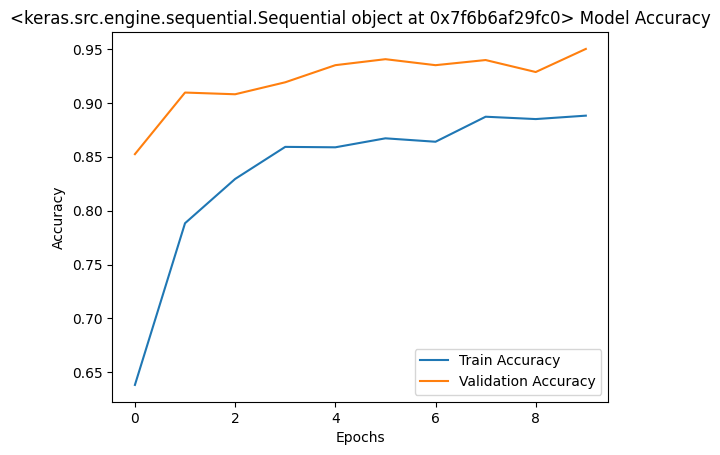

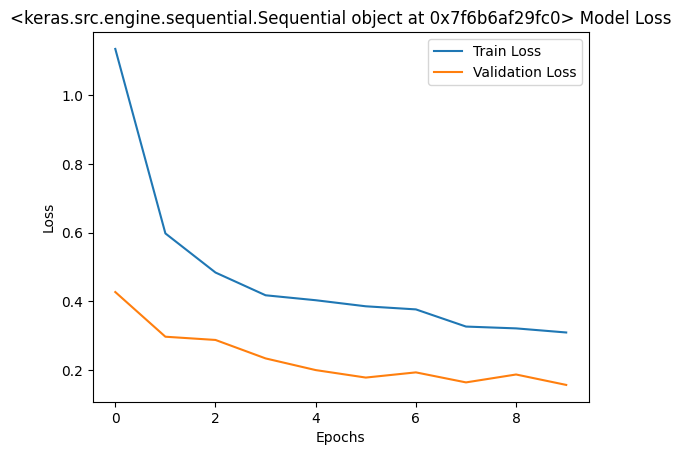

In [ ]:
def plot_training_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{inception_model1} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{inception_model1} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(inception_history1, inception_model1)

In [ ]:
inception_model1.save('model-1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Check model's performance

In [ ]:
pred = inception_model1.predict(test)

85/85 [==============================] - 55s 628ms/step


Extract the class with highest probability for all the test files

In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
labels = train.class_indices

In [ ]:
labels

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
labels = dict((v,k) for k, v in labels.items())

In [ ]:
labels

{0: 'Black Sea Sprat',
 1: 'Gilt-Head Bream',
 2: 'Hourse Mackerel',
 3: 'Red Mullet',
 4: 'Red Sea Bream',
 5: 'Sea Bass',
 6: 'Shrimp',
 7: 'Striped Red Mullet',
 8: 'Trout'}

In [ ]:
y_pred = [labels[k] for k in pred]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(x_test.label, y_pred))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.99      0.97      0.98       321
   Gilt-Head Bream       0.95      0.93      0.94       291
   Hourse Mackerel       0.90      0.99      0.94       290
        Red Mullet       0.98      0.93      0.95       314
     Red Sea Bream       0.98      0.96      0.97       305
          Sea Bass       0.93      0.95      0.94       301
            Shrimp       0.98      0.99      0.99       293
Striped Red Mullet       0.91      0.90      0.91       287
             Trout       0.97      0.96      0.96       298

          accuracy                           0.95      2700
         macro avg       0.95      0.95      0.95      2700
      weighted avg       0.96      0.95      0.95      2700



In [ ]:
print(confusion_matrix(x_test.label, y_pred))

[[312   0   5   0   0   1   2   1   0]
 [  0 270   3   0   7   7   0   0   4]
 [  1   0 287   0   0   0   0   2   0]
 [  1   0   4 292   0   0   1  16   0]
 [  0   7   2   0 293   1   0   1   1]
 [  2   5   1   0   0 287   0   2   4]
 [  0   0   0   0   0   0 291   2   0]
 [  0   0  16   6   0   4   2 259   0]
 [  0   3   0   0   0   8   0   1 286]]


In [ ]:
test_accuracy = inception_model1.evaluate(test)[1]

85/85 [==============================] - 51s 588ms/step - loss: 0.1539 - accuracy: 0.9504


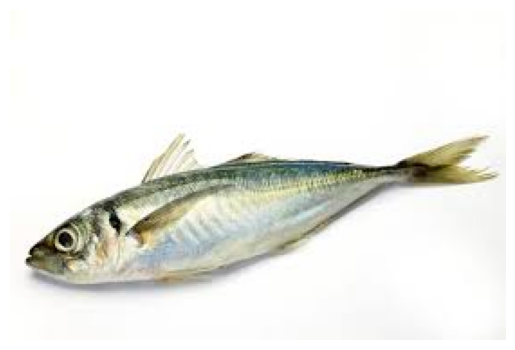

In [ ]:
import numpy as np
from PIL import Image, ImageOps
import cv2
import tensorflow as tf

def import_and_predict(image_data, model):
    size = (180, 180)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    return prediction

# Assuming 'file' contains the path to the image file
# You may need to adapt this part based on how you're handling file uploads
file_path = "/content/house_mackarel.jpeg"  # Change this to your image path

# Load the model
model = tf.keras.models.load_model("/content/model-1.h5")  # Change this to your model path

# Read the image
image = Image.open(file_path)

# For Colab, you can display the image directly using matplotlib
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
predictions = import_and_predict(image, inception_model1)
class_names = ["Black Sea Sprat", "Gilt-Head Bream", "Hourse Mackerel","Red Mullet", "Red Sea Bream", "Sea Bass","Shrimp", "Striped Red Mullet", "Trout"]  # Define your class names here
score = tf.nn.softmax(predictions[0])


In [ ]:
# Output the predictions

print("This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to Hourse Mackerel with a 70.00 percent confidence.
